### **Support Vector Regression (SVR)**


**Import Necessary Libraries**


In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
plt.style.use("seaborn-v0_8-darkgrid")

**Load and Explore the Dataset**


In [369]:
data = pd.read_csv("Population_Vs_Profit.csv")

In [370]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,5.8598,6.8233
2,7.4764,4.3483
3,17.5800,16.4850
4,6.4862,6.5987


In [371]:
data.shape

(105, 2)

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  105 non-null    float64
 1   Profit      105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [373]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,105.0,9.282954,4.758356,5.0269,5.7292,7.2259,11.7000,22.203
Profit,105.0,6.766483,6.235208,-2.6807,2.4406,5.1337,9.0551,24.147


**Prepare Features and Target Variable**


In [374]:
X = data.drop("Profit", axis=1).values
y = data["Profit"].values

**Visualize Feature vs. Target Relationship**


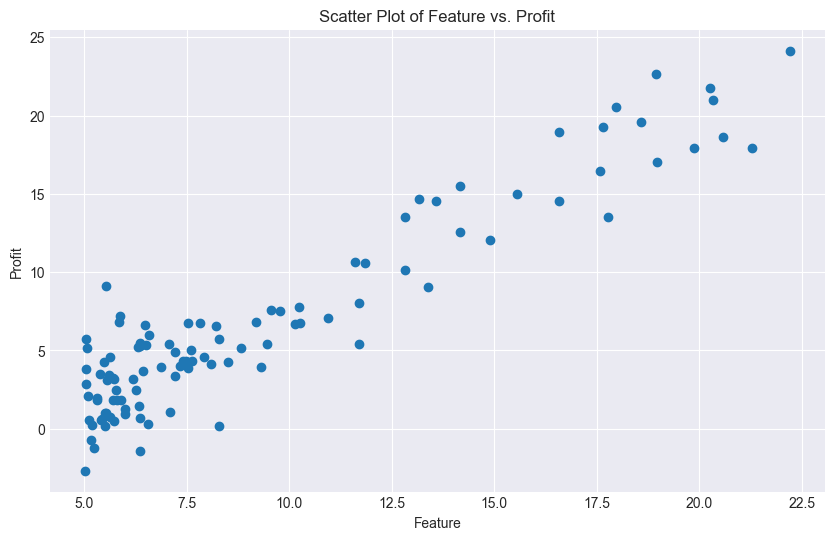

In [375]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Scatter Plot of Feature vs. Profit")
plt.xlabel("Feature")
plt.ylabel("Profit")
plt.show()

**Split Data into Training and Test Sets**


In [376]:
from sklearn.model_selection import train_test_split

In [377]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [378]:
X.shape, X_train.shape, X_test.shape

((105, 1), (70, 1), (35, 1))

**Train SVR Model**


In [379]:
from sklearn.svm import SVR

In [380]:
svr_model = SVR(kernel="linear")
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

**Make Predictions and Evaluate Model Performance**


In [381]:
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

In [382]:
from sklearn.metrics import r2_score

In [383]:
train_r2 = r2_score(y_train, y_train_pred)
print(f"R² Score for Train Set: {train_r2:.6f}")


R² Score for Train Set: 0.859770


In [384]:
test_r2 = r2_score(y_test, y_test_pred)
print(f"R² Score for Test Set: {test_r2:.6f}")

R² Score for Test Set: 0.879427


**Visualize Actual vs. Predicted Profit**


In [385]:
def plot_results(X, y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y_actual, color="blue", label="Actual Profit")
    plt.plot(X, y_pred, color="red", label="Predicted Profit", linewidth=2)
    plt.title(title)
    plt.xlabel("Population")
    plt.ylabel("Profit")
    plt.legend()
    plt.show()

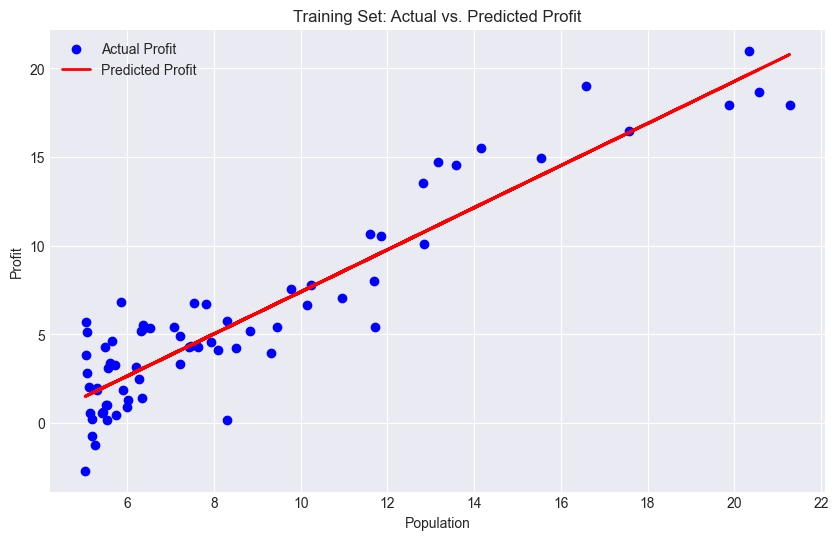

In [386]:
# Visualize results for training set
plot_results(
    X_train, y_train, y_train_pred, "Training Set: Actual vs. Predicted Profit"
)

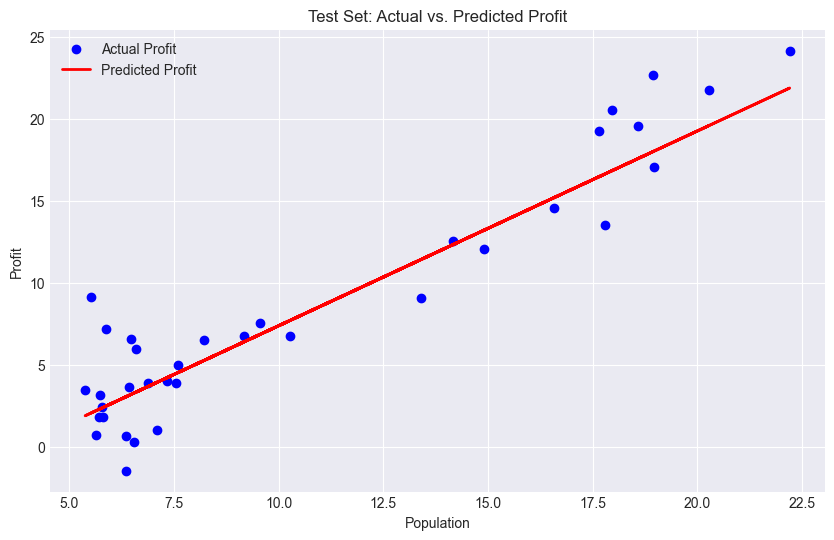

In [387]:
# Visualize results for test set
plot_results(X_test, y_test, y_test_pred, "Test Set: Actual vs. Predicted Profit")